## Data Cleaning: 

### Import Data: 

In [1]:
import pandas as pd

df_ads = pd.read_csv('~/Desktop/ads_nonads.csv')

# SELECT cc_text, ad FROM ads_nonads
df_ads = df_ads[["cc_text", "ad"]]

C:\Users\rbao\AppData\Local\Temp\ipykernel_18060\302034902.py:3: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ads = pd.read_csv('~/Desktop/ads_nonads.csv')


In [2]:
print(df_ads.head())
print(df_ads.shape)
print(df_ads.info())

                                             cc_text ad
0  cold-like symptoms, they will just give you an...  0
1  Thirty percent of the world's <span class="hig...  0
2  the last few years has been really shocking an...  0
3  in. when the tree is harvested and turned into...  0
4  >> as a teacher, the one that scared me the mo...  0
(167145, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167145 entries, 0 to 167144
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cc_text  167143 non-null  object
 1   ad       167143 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB
None


### Cleaning

In [3]:
# drop rows with any missing values
df_ads = df_ads.dropna()
print(df_ads.shape)
# drop duplicate rows
df_ads = df_ads.drop_duplicates()
print(df_ads.shape)
# drop rows where 'ad' is not 0 or 1
df_ads = df_ads[df_ads['ad'].isin([0, 1])]
print(df_ads.shape)

# Convert 'cc_text' column to string
df_ads['cc_text'] = df_ads['cc_text'].astype(str)

# Convert 'ad' column to integer
df_ads['ad'] = df_ads['ad'].astype(int)

(167141, 2)
(150667, 2)
(135566, 2)


In [4]:
# data check after cleaning
print(df_ads["ad"].value_counts())

ad
1    77795
0    57771
Name: count, dtype: int64


In [5]:
# print our the head of the data when ad is 1
print(df_ads[df_ads["ad"] == 1].head())

# print our the head of the data when ad is 0
print(df_ads[df_ads["ad"] == 0].head())

                                              cc_text  ad
11  I've lost count of how many asthma attacks I'v...   1
13  headache, and injection reactions. Ready for a...   1
14  ? One SodaStream bottle can save... i don't kn...   1
19  ? Hello, Sharks. My name is Tracy Rosensteel, ...   1
20  And Joe Biden's weakness makes it even worse. ...   1
                                             cc_text  ad
0  cold-like symptoms, they will just give you an...   0
1  Thirty percent of the world's <span class="hig...   0
2  the last few years has been really shocking an...   0
3  in. when the tree is harvested and turned into...   0
4  >> as a teacher, the one that scared me the mo...   0


#### This dataset is relatively balanced now, so we do text cleaning

In [6]:
df_ads["cc_text"][1]

'Thirty percent of the world\'s <span class="highlight">oceans</span> and and by twenty thirty introducing controls on invasive species and <span class="highlight">reducing</span> <span class="highlight">plastic</span> <span class="highlight">pollution</span> officials insist they can agree ambitious plans to transform our relationship with bio divest E. And ensure that by twenty fifty we obtained a shed vision of living in harmony with nature it all sounds good in theory doesn\'t it but just how realistic other goals lost here the world was stunned when united nations reported the world leaders had failed to meet a single bio diverse city target agreed unite she in twenty ten and I just can\'t be acceptable this time around the scientists claim that now humans are causing the six mass extinction event in the history of <span class="highlight">planet</span> and twenty twenty world economic forum business leaders said by divest you dos was the third biggest risk to the well in terms of 

In [7]:
df_ads["cc_text"][4]

'>> as a teacher, the one that scared me the most. affected their ability to learn. >> inexpensive and effective <span class="highlight">pesticide</span> considered essential by the industry. widely used on farms in 45 states to grow food, wheat every day. ingested the residue and food, <span class="highlight">water</span> <span class="highlight">contamination</span> and when it is sprayed and fields and trees and then carried in the wind. >> the draft that happens goes into their mouth and bodies. >> sarah says in many areas almost no buffer of protection between fields, schools and homes. >> the risk of <span class="highlight">pesticides</span> are too much.> studies show it can impact brain development in children. lower iqs, disabilities, disorders like adhd. >> very very <span class="highlight">toxic</span> <span class="highlight">chemical</span>. very concerned about it. >> contacted lobbying groups, written in support, as well as'

In [8]:
import re

def clean_text(text):
    #  Remove everything within HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [9]:
sample_1 = clean_text(df_ads["cc_text"][1])
print(sample_1)

thirty percent of the worlds oceans and and by twenty thirty introducing controls on invasive species and reducing plastic pollution officials insist they can agree ambitious plans to transform our relationship with bio divest e and ensure that by twenty fifty we obtained a shed vision of living in harmony with nature it all sounds good in theory doesnt it but just how realistic other goals lost here the world was stunned when united nations reported the world leaders had failed to meet a single bio diverse city target agreed unite she in twenty ten and i just cant be acceptable this time around the scientists claim that now humans are causing the six mass extinction event in the history of planet and twenty twenty world economic forum business leaders said by divest you dos was the third biggest risk to the well in terms of likelihood and severity behind only climate change failure and weapons


In [10]:
sample_2 = clean_text(df_ads["cc_text"][11])
print(sample_2)

ive lost count of how many asthma attacks ive had but my nunormal with nucala fewer asthma attacks nucala is a oncemonthly addon injection for severe eosinophilic asthma not for sudden breathing problems allergic reactions can occur get help right away for swelling of face mouth tongue or trouble breathing infections that can cause shingles have occurred dont stop steroids unless told by your doctor tell your doctor if you have a parasitic infection may cause headache injectionsite reactions back pain and fatigue ask your doctor about nucala find your nunormal with nucala wanna hear something amazing you can find 100s of epic deals at kohls right now like sonoma tops for 1099 under shoes starting at 1999 and a keurig coffee maker for 9999 you can also get kohls cash kohls republicans in congress are lying joe bidens plan will lower costs and wont raise taxes on anyone making under 400000 a year he will close loopholes that corporations use to avoid paying taxes


In [11]:
# Apply clean_text function to cc_text column
df_ads["cc_text"] = df_ads["cc_text"].apply(clean_text)

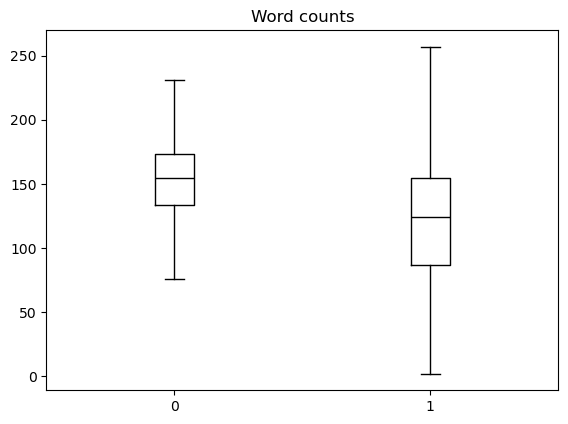

In [12]:
import matplotlib.pyplot as plt

# plot the words count per row

df_ads["Word counts"] = df_ads["cc_text"].str.split().apply(len)
df_ads.boxplot("Word counts", by="ad", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()


DataFrame after filtering based on token length:
(129664, 3)


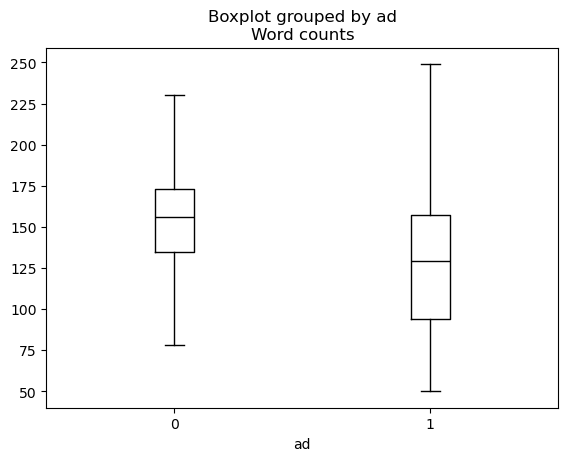

In [13]:
# Filter out rows where token length is less than 50
df_ads = df_ads[df_ads['Word counts'] >= 50]

# Display the DataFrame after filtering
print("\nDataFrame after filtering based on token length:")
df_ads.boxplot("Word counts", by="ad", grid=False, showfliers=False,
           color="black")
print(df_ads.shape)

In [14]:
# Drop the 'Word counts' column if you no longer need it
df_ads = df_ads.drop(columns=['Word counts'])

In [15]:
df_ads["cc_text"].head()

0    coldlike symptoms they will just give you an a...
1    thirty percent of the worlds oceans and and by...
2    the last few years has been really shocking an...
3    in when the tree is harvested and turned into ...
4    as a teacher the one that scared me the most a...
Name: cc_text, dtype: object

### Train-test split

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df_ads["cc_text"]
y = df_ads["ad"]

# Step 1: Split the data into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Split the training+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val) # 0.25 x 0.8 = 0.2

# Print the shapes of the resulting datasets to verify
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (77798,) (77798,)
Validation set size: (25933,) (25933,)
Testing set size: (25933,) (25933,)


### Now you can use training dataset to build your model and text dataset to test the model performance. 

## BERT Processing: 

### Tokenizer

In [17]:
# Run this once and restart the kernal 
#%pip install transformers[sentencepiece] 

In [18]:
#%pip install torch torchvision torchaudio

In [19]:

from transformers import BertTokenizer

checkpoint = "bert-base-cased"
tokenizer = BertTokenizer.from_pretrained(checkpoint)

In [20]:
# tokenize the training, testing, evaluation sets
X_train_tokens = tokenizer(X_train.tolist(), padding=True, truncation=True)
X_test_tokens = tokenizer(X_test.tolist(), padding=True, truncation=True)
X_val_tokens = tokenizer(X_val.tolist(), padding=True, truncation=True)

In [37]:
# Print the first few examples of tokenized training data
print(X_train_tokens.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [22]:
import torch

train_seq = torch.tensor(X_train_tokens["input_ids"])
train_mask = torch.tensor(X_train_tokens["attention_mask"])
train_y = torch.tensor(y_train.tolist())

val_seq = torch.tensor(X_val_tokens["input_ids"])
val_mask = torch.tensor(X_val_tokens["attention_mask"])
val_y = torch.tensor(y_val.tolist())

test_seq = torch.tensor(X_test_tokens["input_ids"])
test_mask = torch.tensor(X_test_tokens["attention_mask"])
test_y = torch.tensor(y_test.tolist())

In [43]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

# Create instances of the CustomDataset
train_dataset = CustomDataset(train_seq, train_mask, train_y)
val_dataset = CustomDataset(val_seq, val_mask, val_y)
test_dataset = CustomDataset(test_seq, test_mask, test_y)

In [44]:
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2  # 2 labels: 0 for non-ads, 1 for ads

model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))


In [45]:
from transformers import Trainer, TrainingArguments

In [46]:
batch_size = 16
logging_steps = len(X_train) // batch_size
logging_steps

4862

In [47]:
# Define the training arguments
model_name = f"{checkpoint}-finetuned-ad-classifier"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

## Small Sample Size Test Run: 

In [50]:
# Let's say you want to use only 5% of the data for a quick test

sample_size = int(0.05 * len(train_dataset))  # 5% of the full training dataset size

# Create smaller datasets by sampling
small_train_dataset = torch.utils.data.Subset(train_dataset, indices=torch.randperm(len(train_dataset))[:sample_size])
small_val_dataset = torch.utils.data.Subset(val_dataset, indices=torch.randperm(len(val_dataset))[:sample_size])
small_test_dataset = torch.utils.data.Subset(test_dataset, indices=torch.randperm(len(test_dataset))[:sample_size])


In [ ]:

from sklearn.metrics import accuracy_score

def get_accuracy(preds):
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}

In [51]:
torch.cuda.empty_cache()

# Initialize the Trainer
trainer = Trainer(
    model=model,
    compute_metrics=get_accuracy,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_val_dataset,
    tokenizer=tokenizer
)

In [52]:
trainer.train()

  0%|          | 0/488 [00:00<?, ?it/s]

  0%|          | 0/244 [00:00<?, ?it/s]

{'eval_loss': 0.2666780948638916, 'eval_runtime': 3017.8353, 'eval_samples_per_second': 1.289, 'eval_steps_per_second': 0.081, 'epoch': 1.0}


  0%|          | 0/244 [00:00<?, ?it/s]

In [ ]:
trainer.evaluate()

In [ ]:
trainer.evaluate(small_test_dataset)

In [ ]:
trainer.save_model()

In [ ]:

model_name

## Sample from another Dataset 

In [ ]:
#lable 1
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('So he could charge rich tourists $12,500 for prime elk hunting. No wonder Sheehy said he end protections for public lands. So if you re for hunting and for access to public lands... ?you cant be for Shady. Montana Outdoor Values Action Fund is responsible for the content of this ad.')
     

In [ ]:
#lable 0 
classifer('In the meantime I think we have to provide the studies necessary no thanks he s palestine residents say the study has a good first step but they also need medical care to go with it a resident still do not have also caller just a companion bill in the senate is being cosponsored by republican J. D. Vance and democrat sherrod brown to also help push the I. R. S. To announce wednesday the twenty one million dollars norfolk southern says it has paid directly to residents will not be taxed the norfolk southern do that there was a community the I. R. S. Did damage on top of that and we fix that those who have already reported the payments on their twenty twenty three taxes will need to amend the returns to get a refund last month norfolk southern also agreed to pay three hundred ten million dollars for cleanup and other fees bringing its total expected costs related to the derailment to one point seven billion dollars in washington cary leahy spectrum news you number released this week')